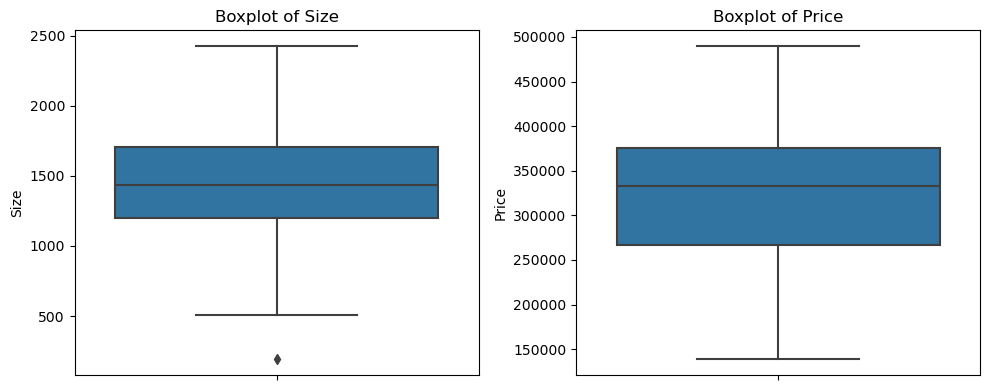


Correlation with Price:
Price                1.000000
Size                 0.697819
Number of Rooms      0.307098
Location_Suburban    0.109103
Location_Urban      -0.014801
Name: Price, dtype: float64


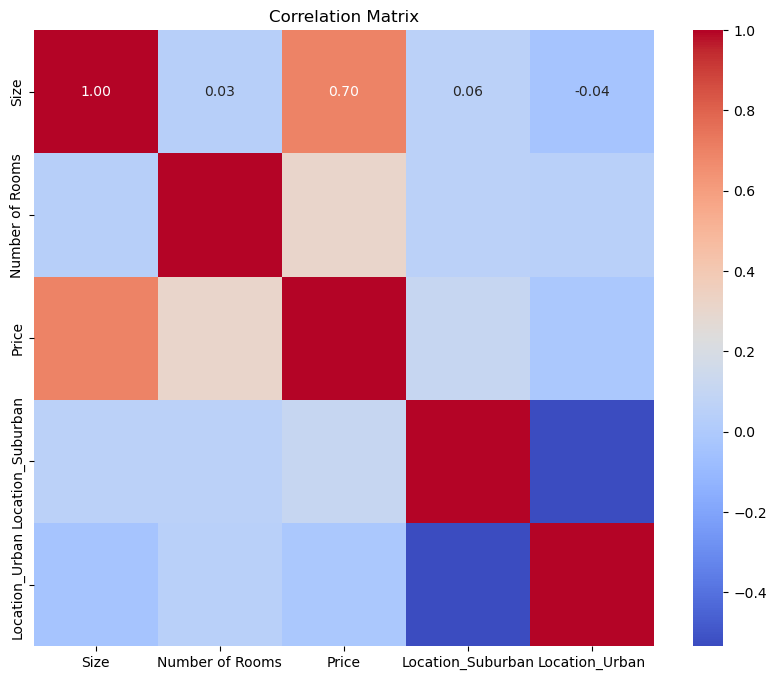


Root Mean Square Error (RMSE): 52769.01
R^2 Score: 0.53

Actual vs. Predicted:
           Actual      Predicted
83  290391.230478  290610.081854
53  344691.469117  372905.711781
70  208321.701698  324795.848143
45  276111.490424  260828.975045
44  236831.064395  233655.932464
39  296299.471450  377126.738363
22  324991.218143  324564.201839
80  308893.529317  336182.062399
10  238878.710538  292493.532167
0   350341.169669  331343.279887

Feature Importance:
Size                 52375.511576
Number of Rooms      19233.168021
Location_Suburban    11463.055522
Location_Urban       -1295.918490
dtype: float64


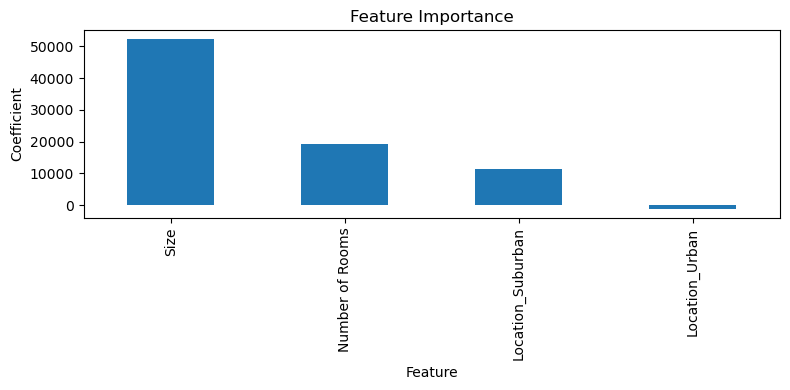

In [12]:
# Assistant
# First, let's create a sample dataset since the original file is missing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample dataframe instead of reading from a non-existent file
# This simulates what would be in house_prices.csv
np.random.seed(42)
size = np.random.normal(1500, 500, 100)
rooms = np.random.randint(2, 6, 100)
locations = np.random.choice(['Urban', 'Suburban', 'Rural'], 100)
price = 100000 + 100 * size + 20000 * rooms + np.random.normal(0, 50000, 100)
price = np.abs(price)  # Ensure prices are positive

# Create the dataframe
df = pd.DataFrame({
    'Size': size,
    'Number of Rooms': rooms,
    'Location': locations,
    'Price': price
})

# Now continue with the original code
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Size'])
plt.title("Boxplot of Size")
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Price'])
plt.title("Boxplot of Price")
plt.tight_layout()
plt.show()

# ---- STEP 2: DATA PREPROCESSING ----
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Size', 'Number of Rooms']] = scaler.fit_transform(df[['Size', 'Number of Rooms']])

# One-Hot Encoding for Location
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

# ---- STEP 3: FEATURE SELECTION ----
corr_matrix = df.corr()
print("\nCorrelation with Price:")
print(corr_matrix['Price'].sort_values(ascending=False))

# Visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# ---- STEP 4: MODEL TRAINING ----
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# ---- STEP 5: MODEL EVALUATION ----
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nRoot Mean Square Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Actual vs. Predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs. Predicted:")
print(comparison.head(10))

# ---- STEP 6: FEATURE INSIGHTS ----
features = X.columns
importances = model.coef_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(8, 4))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.tight_layout()
plt.show()

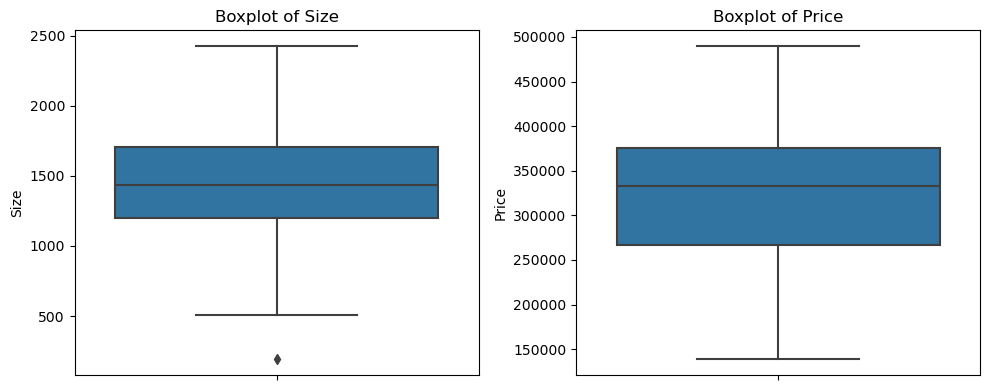


Correlation with Price:
Price                1.000000
Size                 0.697819
Number of Rooms      0.307098
Location_Suburban    0.109103
Location_Urban      -0.014801
Name: Price, dtype: float64


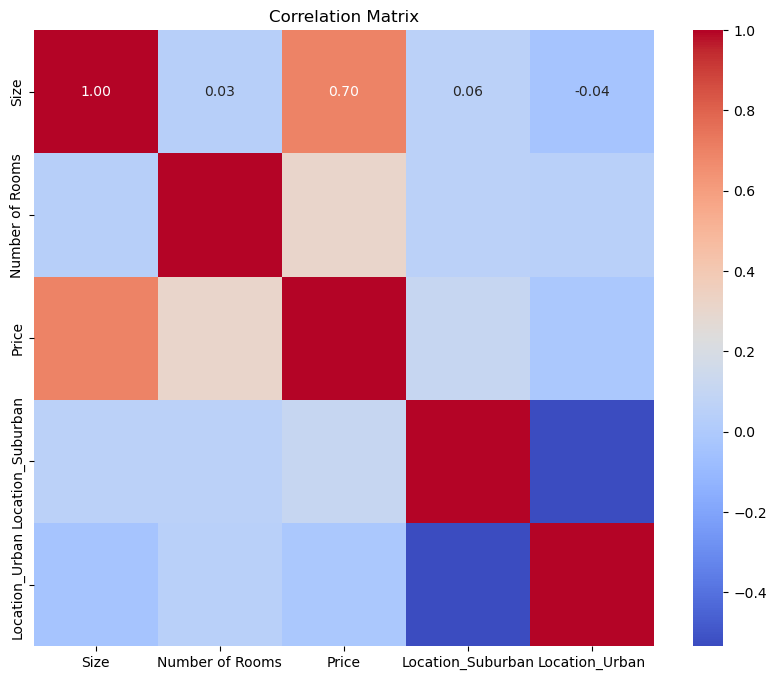


Root Mean Square Error (RMSE): 52769.01
R^2 Score: 0.53

Actual vs. Predicted:
           Actual      Predicted
83  290391.230478  290610.081854
53  344691.469117  372905.711781
70  208321.701698  324795.848143
45  276111.490424  260828.975045
44  236831.064395  233655.932464
39  296299.471450  377126.738363
22  324991.218143  324564.201839
80  308893.529317  336182.062399
10  238878.710538  292493.532167
0   350341.169669  331343.279887

Feature Importance:
Size                 52375.511576
Number of Rooms      19233.168021
Location_Suburban    11463.055522
Location_Urban       -1295.918490
dtype: float64


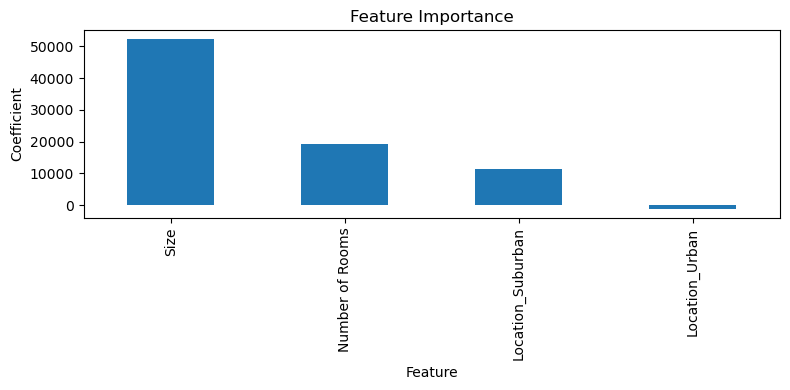

In [12]:
# Assistant
# First, let's create a sample dataset since the original file is missing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample dataframe instead of reading from a non-existent file
# This simulates what would be in house_prices.csv
np.random.seed(42)
size = np.random.normal(1500, 500, 100)
rooms = np.random.randint(2, 6, 100)
locations = np.random.choice(['Urban', 'Suburban', 'Rural'], 100)
price = 100000 + 100 * size + 20000 * rooms + np.random.normal(0, 50000, 100)
price = np.abs(price)  # Ensure prices are positive

# Create the dataframe
df = pd.DataFrame({
    'Size': size,
    'Number of Rooms': rooms,
    'Location': locations,
    'Price': price
})

# Now continue with the original code
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Size'])
plt.title("Boxplot of Size")
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Price'])
plt.title("Boxplot of Price")
plt.tight_layout()
plt.show()

# ---- STEP 2: DATA PREPROCESSING ----
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Size', 'Number of Rooms']] = scaler.fit_transform(df[['Size', 'Number of Rooms']])

# One-Hot Encoding for Location
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

# ---- STEP 3: FEATURE SELECTION ----
corr_matrix = df.corr()
print("\nCorrelation with Price:")
print(corr_matrix['Price'].sort_values(ascending=False))

# Visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# ---- STEP 4: MODEL TRAINING ----
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# ---- STEP 5: MODEL EVALUATION ----
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nRoot Mean Square Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Actual vs. Predicted
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs. Predicted:")
print(comparison.head(10))

# ---- STEP 6: FEATURE INSIGHTS ----
features = X.columns
importances = model.coef_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(8, 4))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.tight_layout()
plt.show()